In [2]:
# Importing the libraries
import os
import math

from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mnso

# Loading the dataset
data_path = Path("data")
data_file = os.path.join(data_path, 'marketing_campaign.csv')

data = pd.read_csv(data_file, sep='\t')
display(data.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# Shape of data
print('Shape of dataset :', data.shape)

Shape of dataset : (2240, 29)


In [4]:
#Information on features 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
display(data.describe())

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
# nunique of dataset
print(data.nunique())

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64


In [7]:
# Drop column 'Z_CostContact' and 'Z_Revenue'
data.drop(['Z_Revenue', 'Z_CostContact', 'ID'], axis = 1, inplace = True)

### Data Cleaning

Handling missing values

In [8]:
# Checking missing values
print(data.isna().sum())

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64


In [9]:
# Handling missing values
data.dropna(inplace=True)
print("The shape of data-points after removing the rows with missing values are:", data.shape)

The shape of data-points after removing the rows with missing values are: (2216, 26)


Check duplicate data

In [10]:
# Check duplicate data
display(data[data.duplicated()])

# Count duplicate data
print('Duplicate Data :', data.duplicated().sum())

# Drop duplicate data
data.drop_duplicates(inplace = True)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
83,1963,Master,Together,38620.0,0,0,11-05-2013,56,112,17,...,5,3,3,0,0,0,0,0,0,0
179,1951,2n Cycle,Married,78497.0,0,0,01-12-2013,44,207,26,...,7,12,2,0,0,0,1,0,0,0
281,1976,Graduation,Together,51369.0,0,1,25-10-2012,84,297,7,...,2,4,8,0,0,0,0,0,0,0
282,1946,Graduation,Together,37760.0,0,0,31-08-2012,20,84,5,...,1,6,7,0,0,0,0,0,0,0
363,1978,PhD,Married,37717.0,1,0,23-11-2012,31,9,0,...,0,2,9,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,1978,Graduation,Together,22775.0,1,0,19-06-2013,40,5,1,...,0,2,8,0,0,0,0,0,0,0
2221,1982,Master,Single,75777.0,0,0,04-07-2013,12,712,26,...,6,11,1,0,1,1,0,0,0,1
2225,1968,Graduation,Together,58554.0,1,1,26-09-2012,55,368,24,...,2,6,7,0,0,0,0,0,0,0
2234,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,3,...,0,2,7,0,0,0,0,0,0,0


Duplicate Data : 182


In [11]:
# Count duplicate data
print('Duplicate Data :', data.duplicated().sum())

Duplicate Data : 0


Handling outliers

In [12]:
data.nunique()

Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

C:\Users\WINDOWS\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


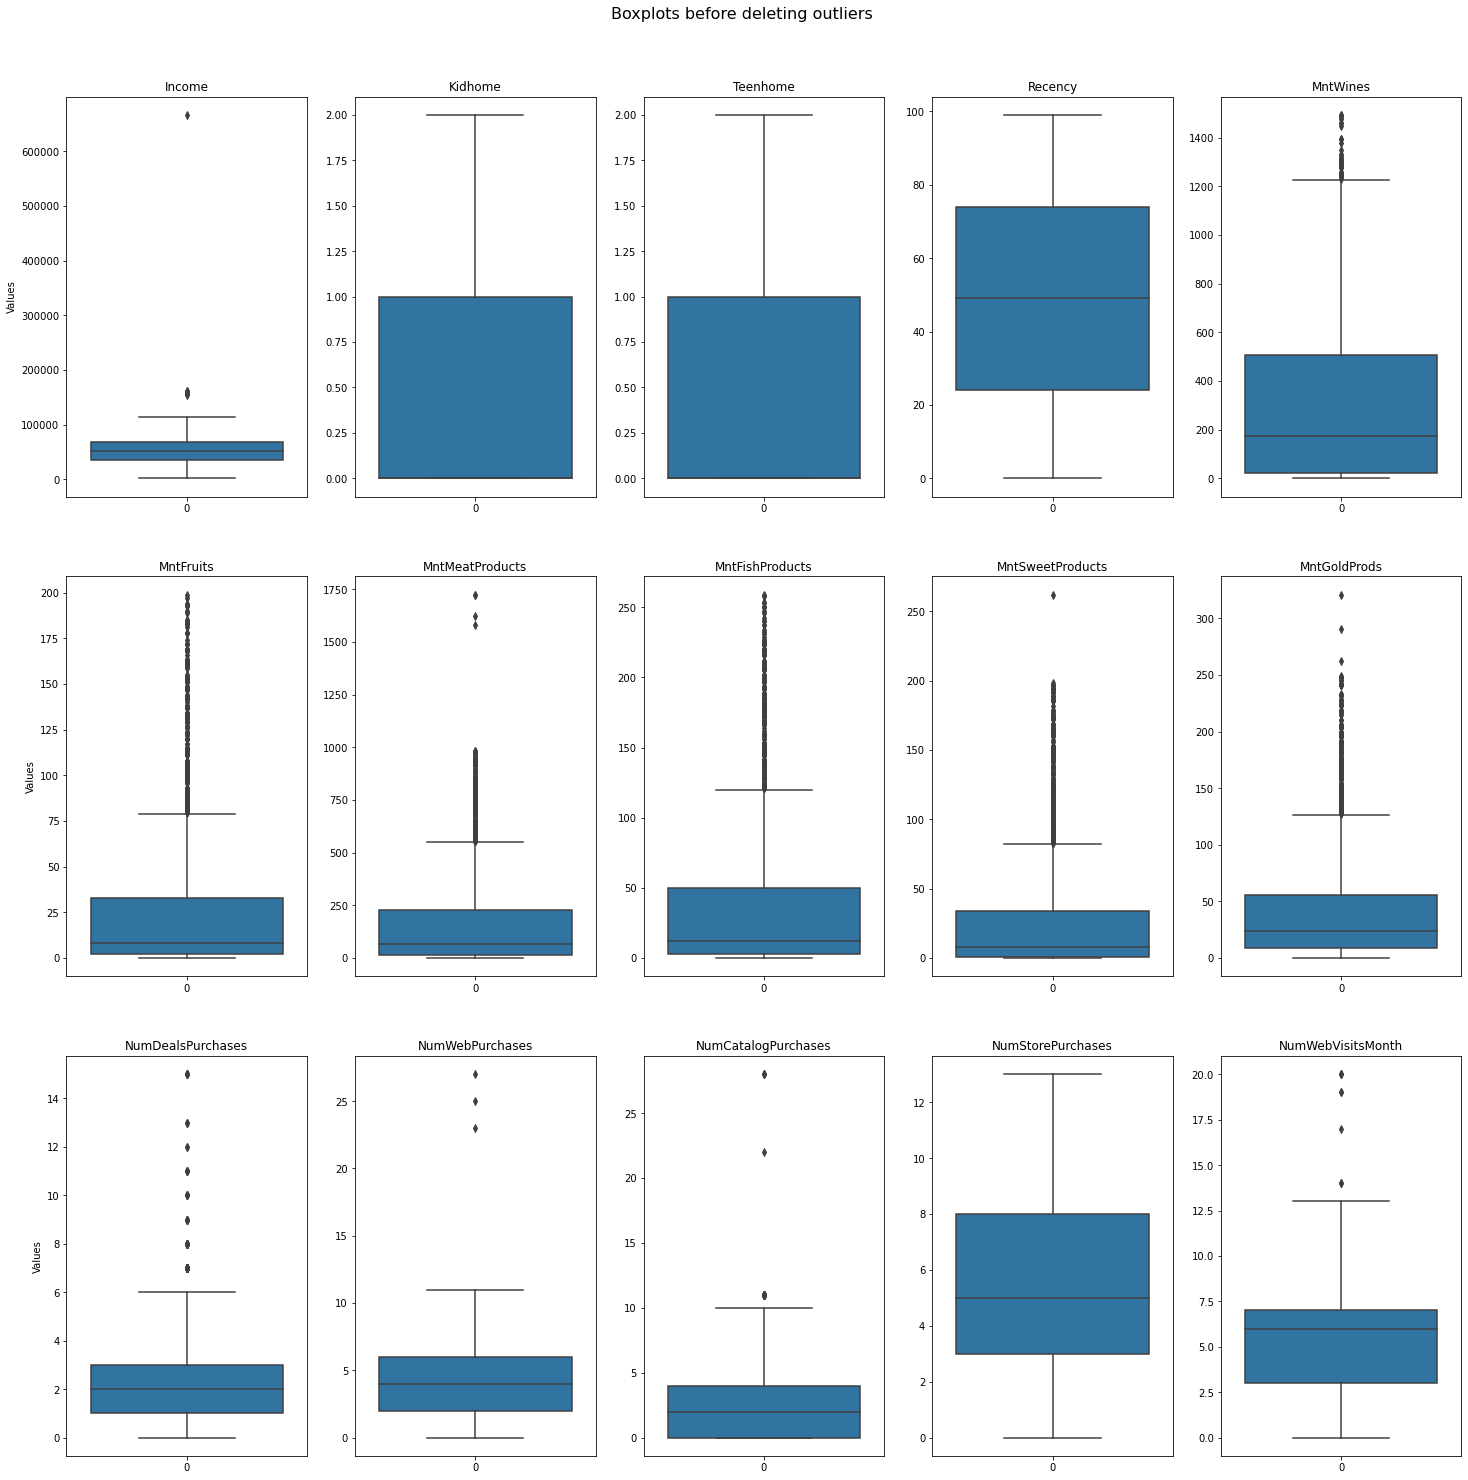

In [13]:
data_numeric = data.select_dtypes('number')
data_numeric.drop(['Year_Birth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'], axis = 1, inplace = True)

def box_plot(dataset, cols, suptitle, size):
    fig, axs = plt.subplots(math.ceil(dataset.shape[1]/cols), cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, col in enumerate(list(dataset)):
        if i % 5 == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot(data=dataset[col], ax=axs[i])
        axs[i].set_title(col)
        
box_plot(dataset=data_numeric, cols = 5, suptitle='Boxplots before deleting outliers', size=(25,25))

In [14]:
# Handling outliers
a = list(data_numeric.columns)

for col in data[a] :
    percentiles = data[col].quantile([0.01,0.99]).values
    data[col][data[col] <= percentiles[0]] = percentiles[0]
    data[col][data[col] >= percentiles[1]] = percentiles[1]

C:\Users\WINDOWS\AppData\Local\Temp/ipykernel_4236/2095237748.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] <= percentiles[0]] = percentiles[0]
C:\Users\WINDOWS\AppData\Local\Temp/ipykernel_4236/2095237748.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] >= percentiles[1]] = percentiles[1]
C:\Users\WINDOWS\AppData\Local\Temp/ipykernel_4236/2095237748.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

C:\Users\WINDOWS\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


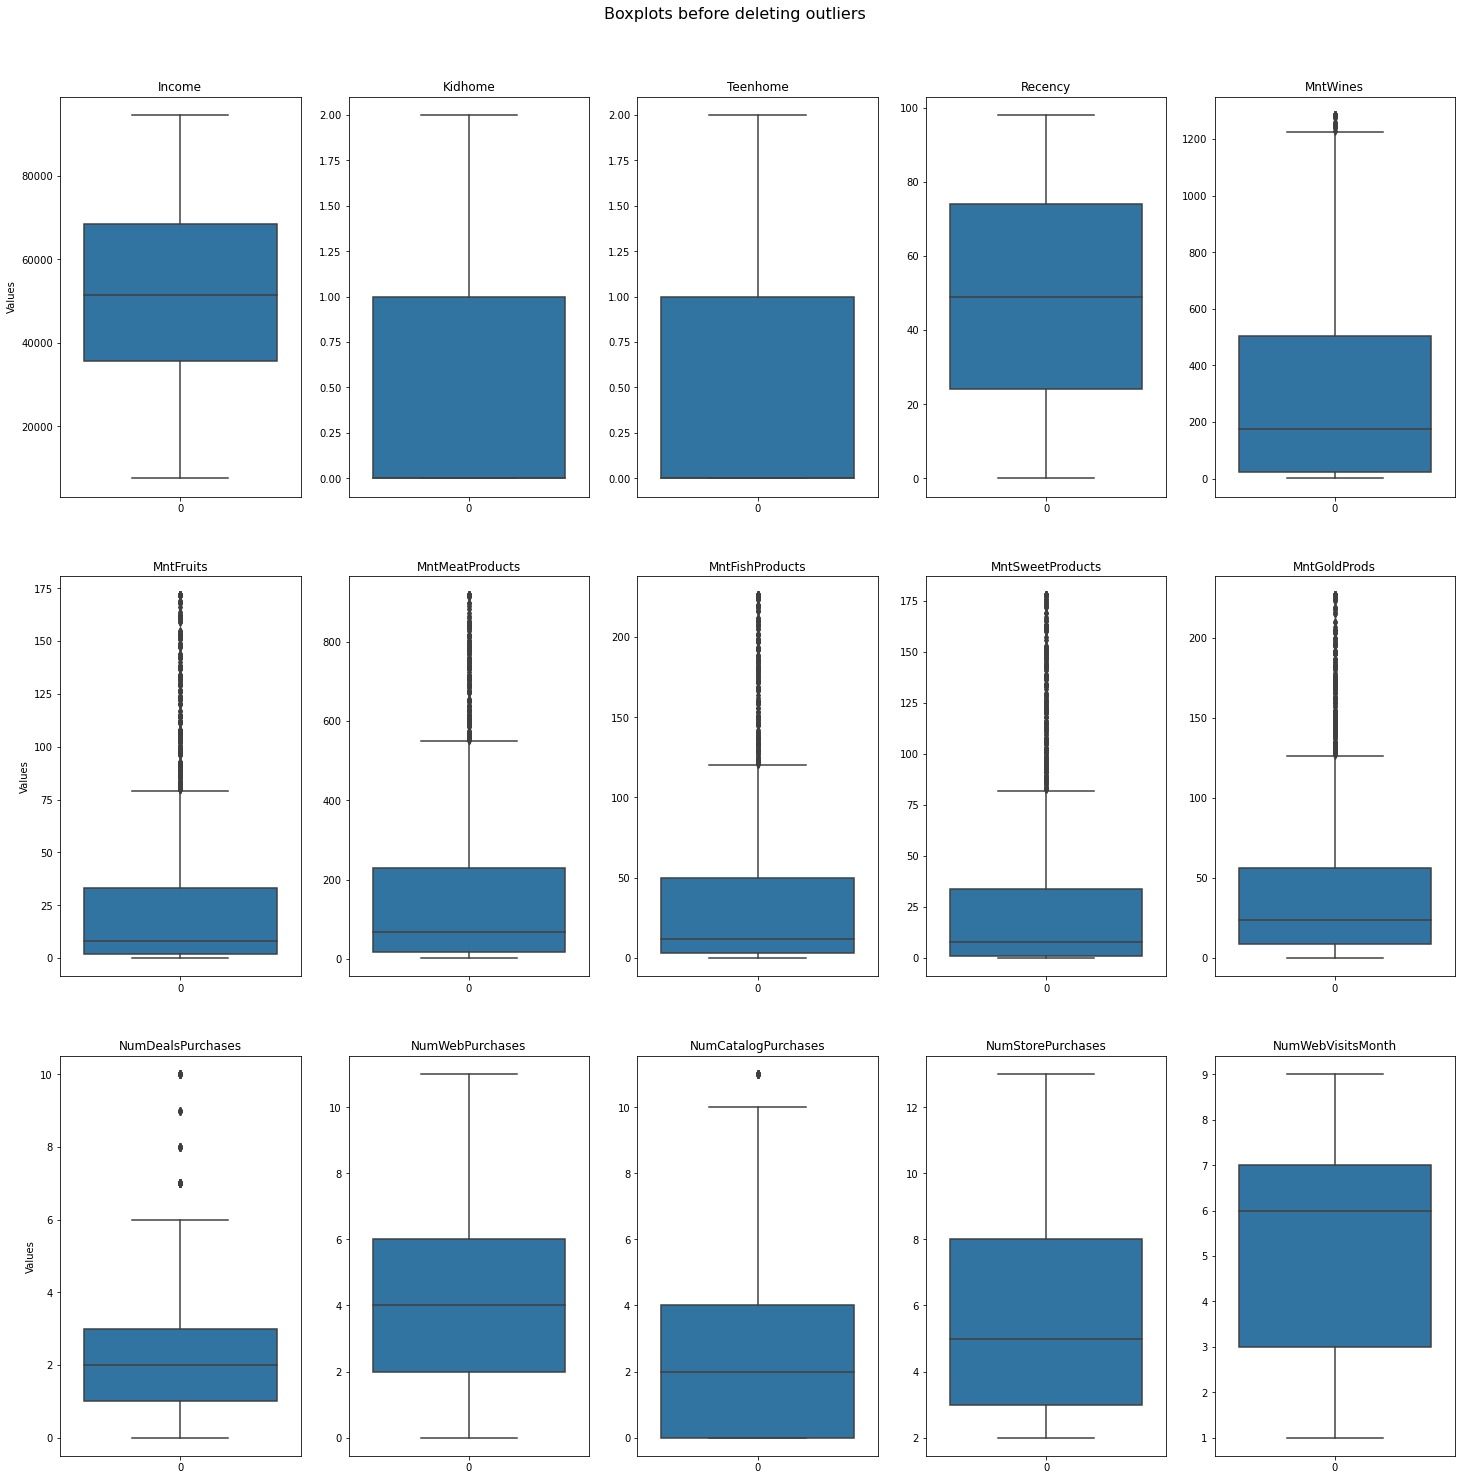

In [15]:
data_numeric = data.select_dtypes('number')
data_numeric.drop(['Year_Birth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'], axis = 1, inplace = True)

box_plot(dataset=data_numeric, cols = 5, suptitle='Boxplots before deleting outliers', size=(25,25))

### Feature Engineering

Convert column type

In [16]:
# Convert column "Dt_Customer" to datetime
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])

Feature Creation

In [17]:
data['Age'] = 2022 - data['Year_Birth']

Binning

In [18]:
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'],'Relationship')
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

data['Education'] = data['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')  
data['Education'] = data['Education'].replace(['Basic'], 'Under Graduate')

print(data['Education'].value_counts())
print(data['Marital_Status'].value_counts())

Post Graduate     1985
Under Graduate      49
Name: Education, dtype: int64
Relationship    1302
Single           732
Name: Marital_Status, dtype: int64


Feature Extraction

In [20]:
# Create feature 'Kids'
data['Kids'] = data['Kidhome'] + data['Teenhome']

# Create feature 'Total_Spent'
data['Total_Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

# Create feature 'Total_Spent'
data['TotalAcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

# Create feature 'TotalPurchases'
data['TotalPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

In [21]:
# Changing Dt_customer into timestamp format
data['day_engaged'] = (pd.to_datetime('01-01-2015') - data['Dt_Customer']).dt.days

Drop Column

In [22]:
data.drop(['Kidhome', 'Teenhome', 'Year_Birth'], axis = 1, inplace = True)
display(data.head())

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,Total_Spent,TotalAcceptedCmp,TotalPurchases,day_engaged
0,Post Graduate,Single,58138.0,2012-04-09,58,635,88,546.0,172.0,88,...,0,0,0,1,65,0,1617.0,0,22,997
1,Post Graduate,Single,46344.0,2014-08-03,38,11,1,6.0,2.0,1,...,0,0,0,0,68,2,27.0,0,4,151
2,Post Graduate,Relationship,71613.0,2013-08-21,26,426,49,127.0,111.0,21,...,0,0,0,0,57,0,776.0,0,20,498
3,Post Graduate,Relationship,26646.0,2014-10-02,26,11,4,20.0,10.0,3,...,0,0,0,0,38,1,53.0,0,6,91
4,Post Graduate,Relationship,58293.0,2014-01-19,94,173,43,118.0,46.0,27,...,0,0,0,0,41,1,422.0,0,14,347


## Exploratory  Data Analysis

### Univariate Analysis

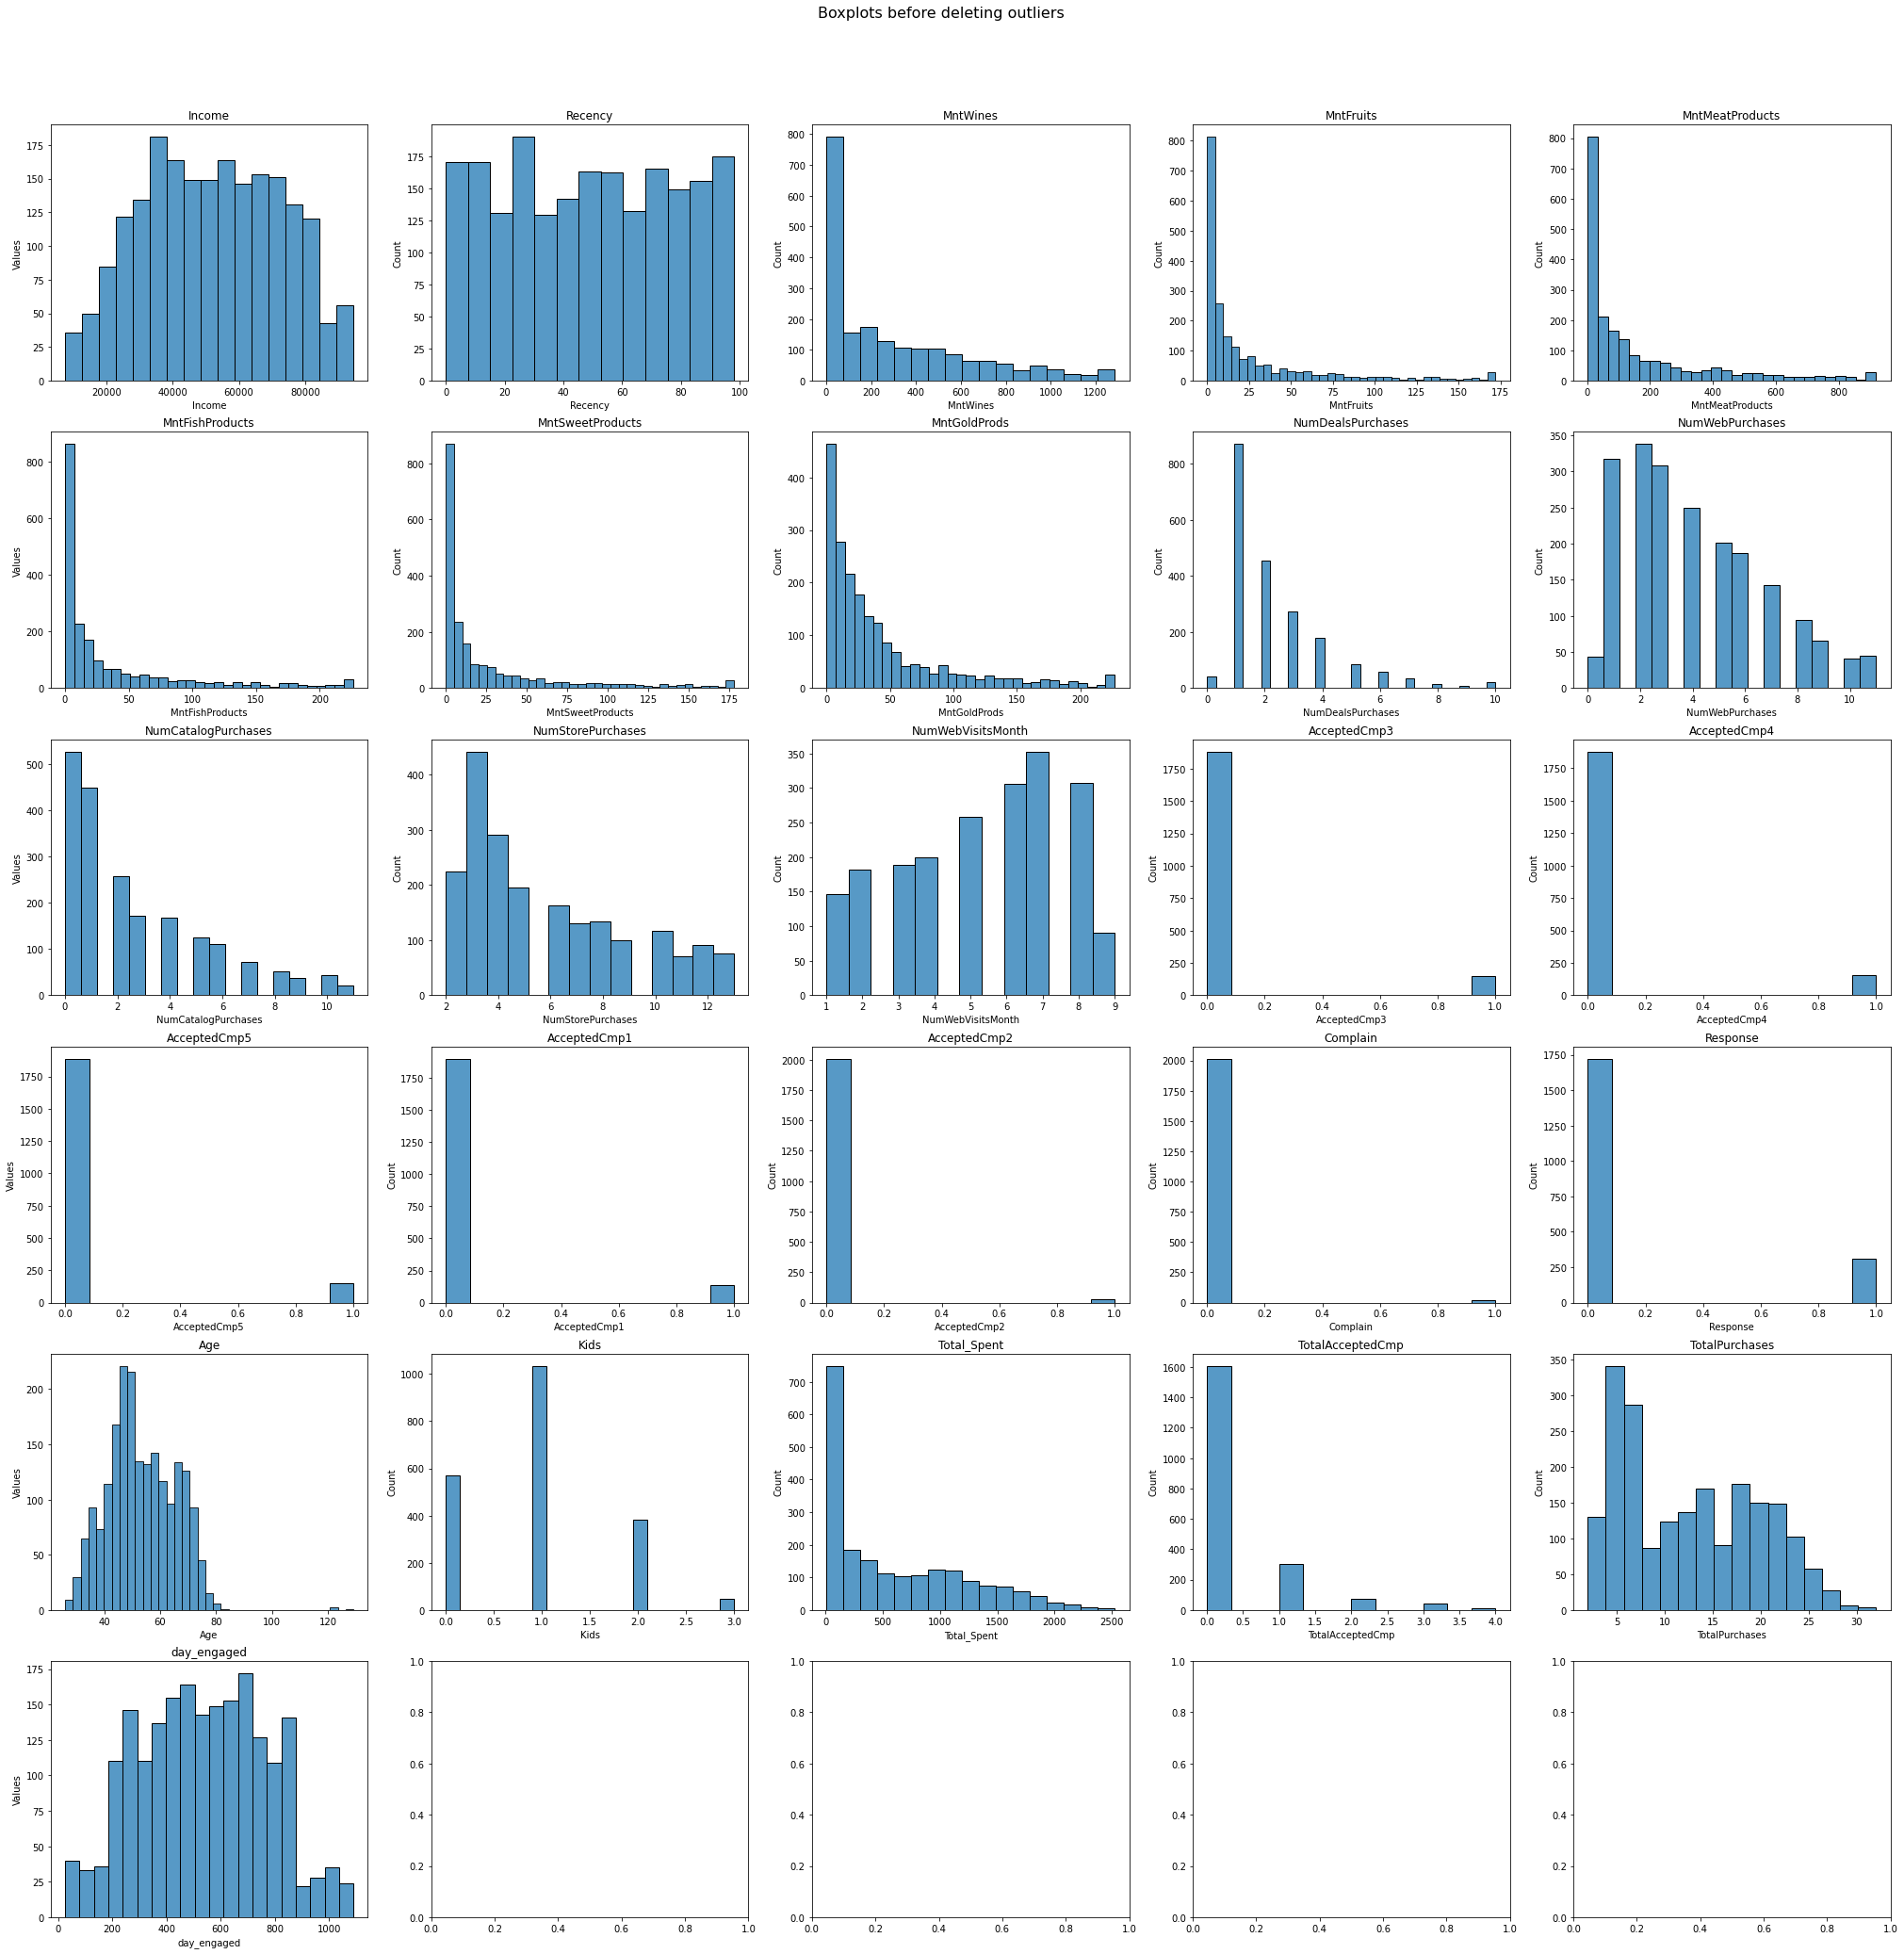

In [23]:
data_numeric = data.select_dtypes('number')
data_categorical = data.select_dtypes('object')

# Visualizations
def plot_univariate(plot, dataset, cols, suptitle, size):
    fig, axs = plt.subplots(math.ceil(dataset.shape[1]/cols), cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(list(dataset)):
        if i % 5 == 0:
            axs[i].set_ylabel('Values')
        plot(x=data, data=dataset, ax=axs[i])
        axs[i].set_title(data)

plot_univariate(plot=sns.histplot, dataset=data_numeric, cols = 5, suptitle='Boxplots before deleting outliers', size=(35,35))

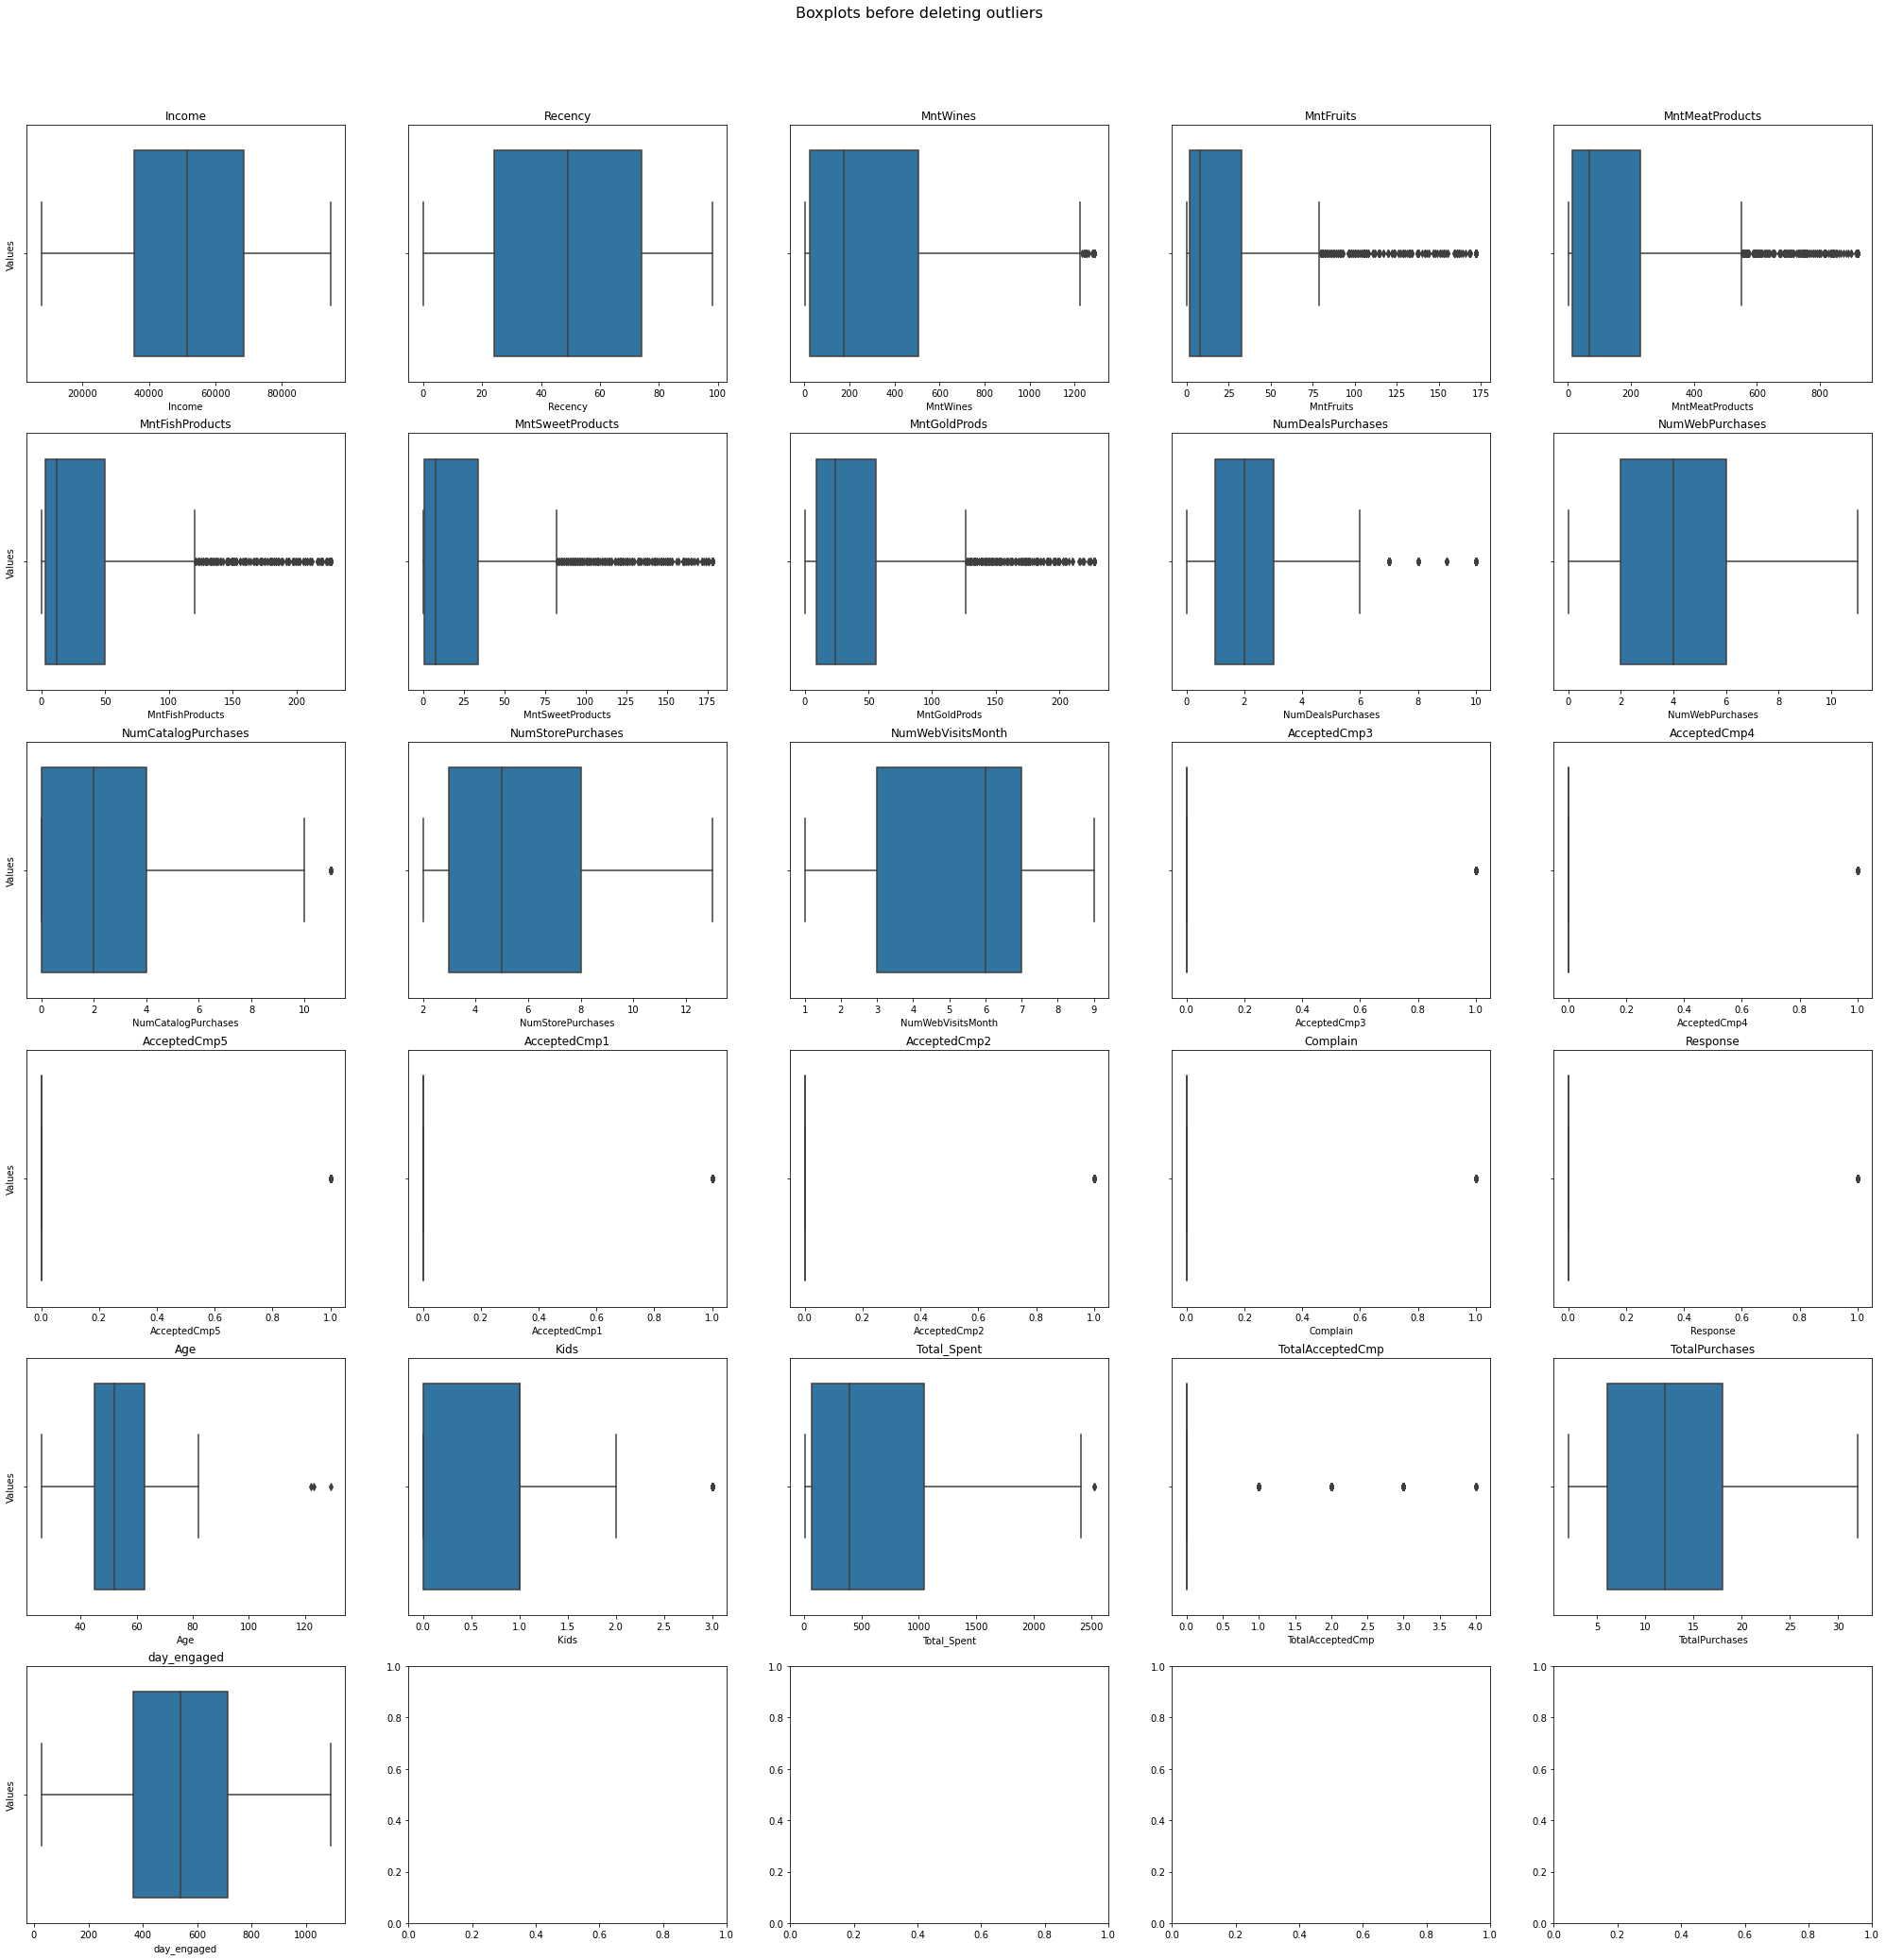

In [24]:
plot_univariate(plot=sns.boxplot, dataset=data_numeric, cols = 5, suptitle='Boxplots before deleting outliers', size=(35,35))

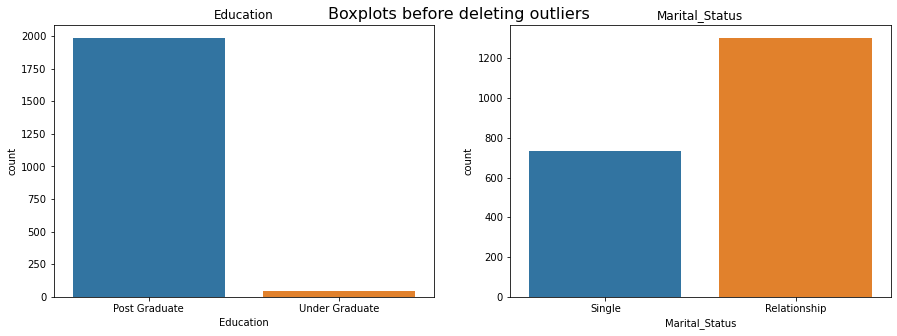

In [25]:
plot_univariate(plot=sns.countplot, dataset=data_categorical, cols = 2, suptitle='Boxplots before deleting outliers', size=(15,5))

### Analysis Multivariate

Income

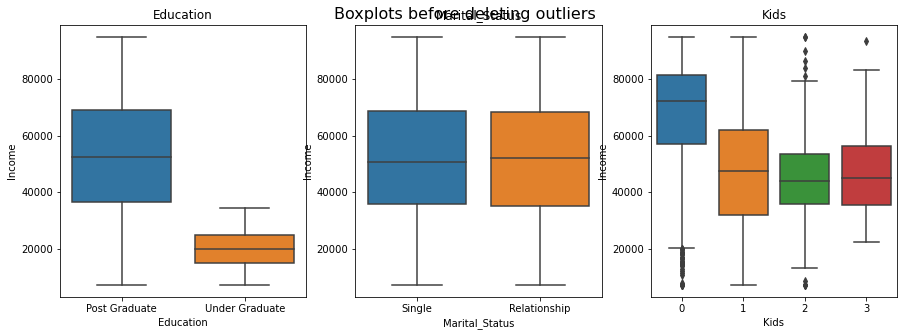

In [26]:
column_vs_income = ['Education', 'Marital_Status', 'Kids']

def plot_multivariate(plot, x, y, dataset, cols, suptitle, size):
    fig, axs = plt.subplots(math.ceil(len(x)/cols), cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, col in enumerate(x):
        if i % 5 == 0:
            axs[i].set_ylabel('Values')
        plot(x = col, y = y, data=dataset, ax=axs[i])
        axs[i].set_title(col)
        
plot_multivariate(plot = sns.boxplot, x = column_vs_income, y = 'Income', dataset=data, cols = 3, suptitle='Boxplots before deleting outliers', size=(15,5))

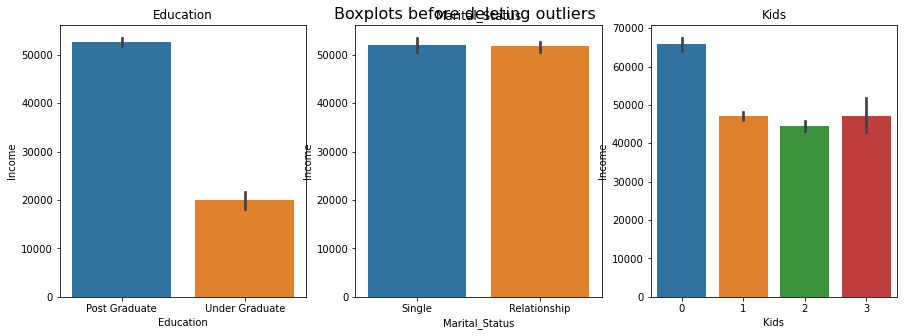

In [27]:
plot_multivariate(plot = sns.barplot, x = column_vs_income, y = 'Income', dataset=data, cols = 3, suptitle='Boxplots before deleting outliers', size=(15,5))

<AxesSubplot:xlabel='Age', ylabel='Income'>

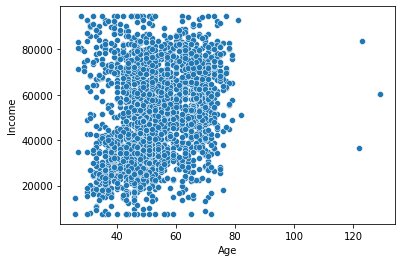

In [28]:
sns.scatterplot(x='Age', y='Income', data=data)

Total_Spent

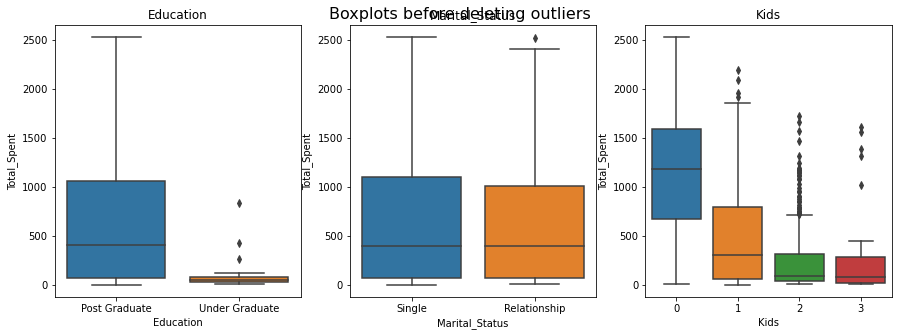

In [29]:
plot_multivariate(plot = sns.boxplot, x = column_vs_income, y = 'Total_Spent', dataset=data, cols = 3, suptitle='Boxplots before deleting outliers', size=(15,5))

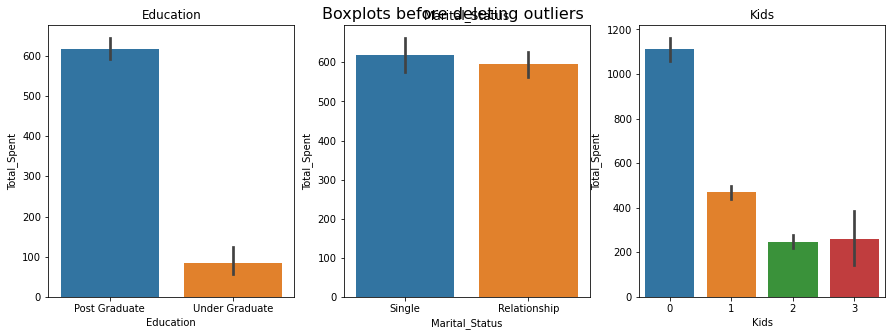

In [30]:
plot_multivariate(plot = sns.barplot, x = column_vs_income, y = 'Total_Spent', dataset=data, cols = 3, suptitle='Boxplots before deleting outliers', size=(15,5))

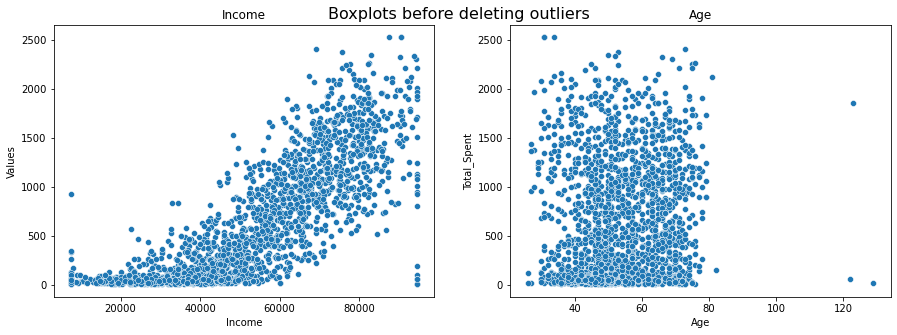

In [31]:
vs_total_spent = ['Income', 'Age']

plot_multivariate(plot = sns.scatterplot, x = vs_total_spent, y = 'Total_Spent', dataset=data, cols = 2, suptitle='Boxplots before deleting outliers', size=(15,5))

TotalPurchases

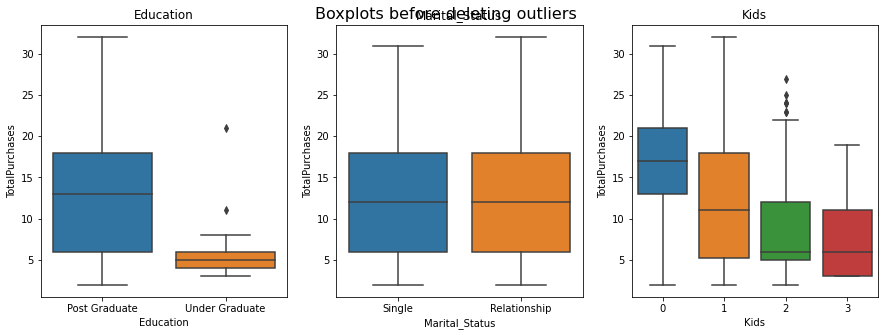

In [33]:
plot_multivariate(plot = sns.boxplot, x = column_vs_income, y = 'TotalPurchases', dataset=data, cols = 3, suptitle='Boxplots before deleting outliers', size=(15,5))

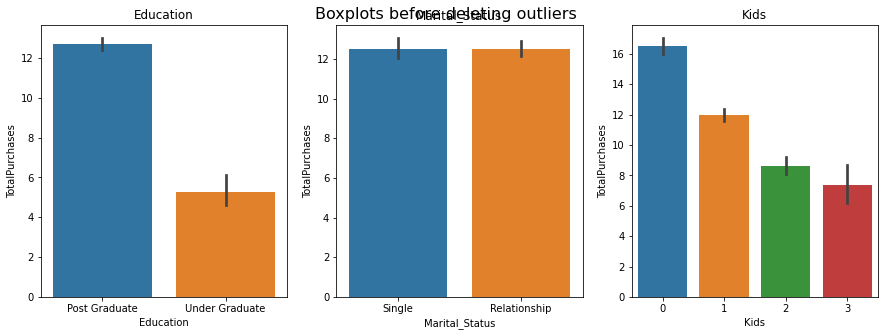

In [34]:
plot_multivariate(plot = sns.barplot, x = column_vs_income, y = 'TotalPurchases', dataset=data, cols = 3, suptitle='Boxplots before deleting outliers', size=(15,5))

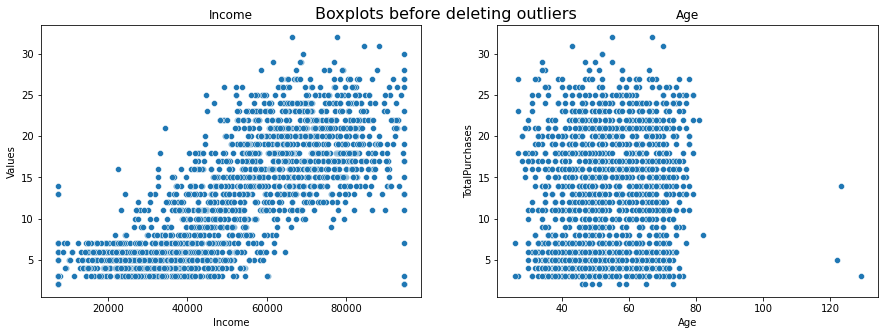

In [35]:
plot_multivariate(plot = sns.scatterplot, x = vs_total_spent, y = 'TotalPurchases', dataset=data, cols = 2, suptitle='Boxplots before deleting outliers', size=(15,5))

TotalAcceptedCmp

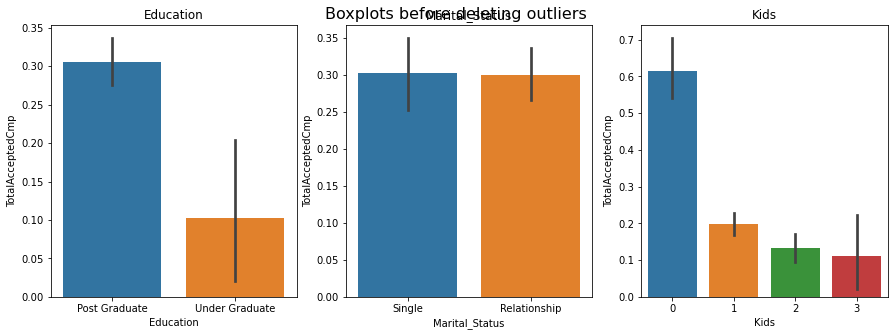

In [36]:
plot_multivariate(plot = sns.barplot, x = column_vs_income, y = 'TotalAcceptedCmp', dataset=data, cols = 3, suptitle='Boxplots before deleting outliers', size=(15,5))

##  Customer Segmentation

In [37]:
data.drop('Dt_Customer', axis = 1, inplace = True)

Feature engineering

In [38]:
# Categiral Encoding
import category_encoders as ce

cat = []
for column in data :
    if data[column].dtypes == 'object' :
        cat.append(column)

encoder = ce.OneHotEncoder(cols=cat)
data_cs = encoder.fit_transform(data)

In [39]:
# Feature scalling
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
data_cs = SS.fit_transform(data_cs)

Elbow Method

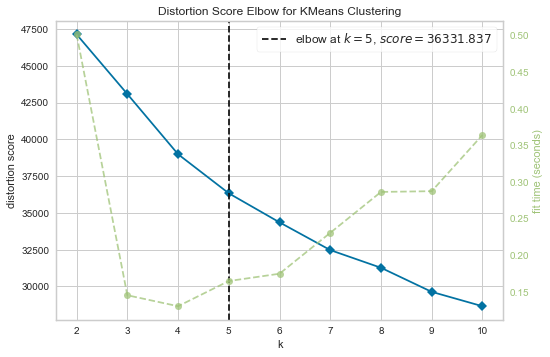

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Quick examination of elbow method to find numbers of clusters to make.
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_cs)
Elbow_M.show()

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

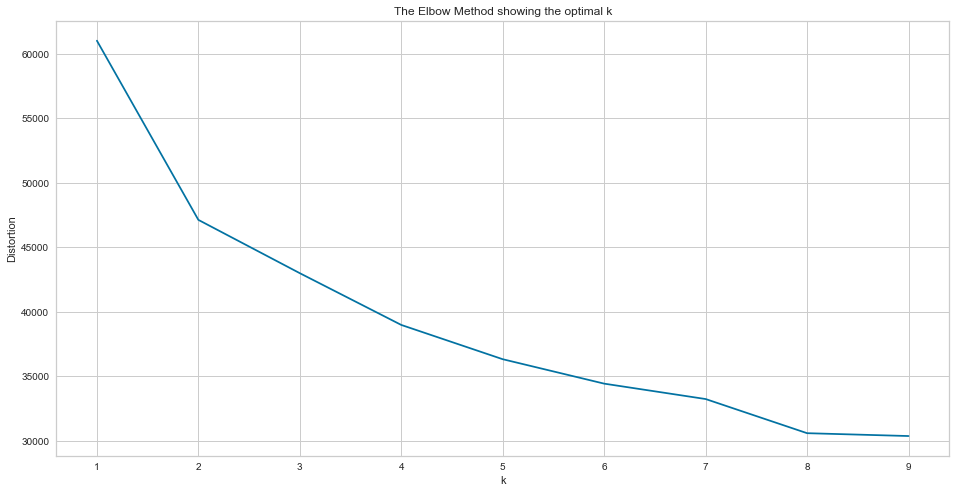

In [41]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_cs)
    distortions.append(kmeanModel.inertia_)
    plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_cs)
identified_clusters = kmeans.fit_predict(data_cs)
print(identified_clusters)

data['cluster'] = identified_clusters

[1 0 1 ... 1 1 0]


### Data profiling

Number of Clustering

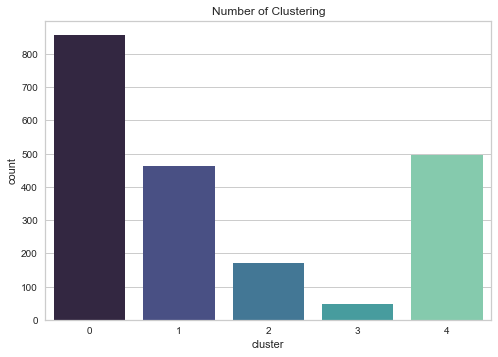

In [45]:
sns.countplot(x='cluster', data=data, palette="mako")
plt.title('Number of Clustering')
plt.show()

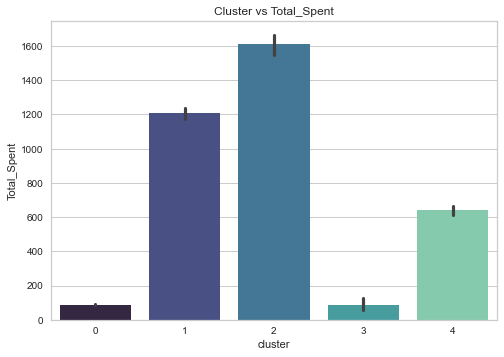

In [46]:
sns.barplot(x='cluster', y='Total_Spent', data=data, palette="mako")
plt.title('Cluster vs Total_Spent')
plt.show()

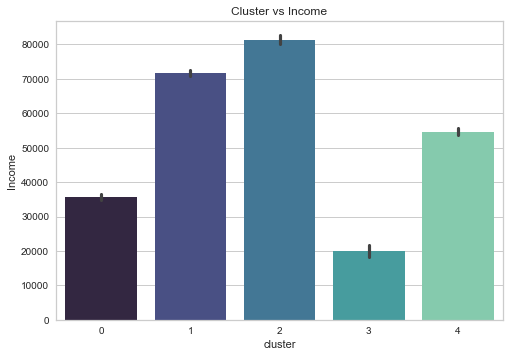

In [47]:
sns.barplot(x='cluster', y='Income', data=data, palette="mako")
plt.title('Cluster vs Income')
plt.show()

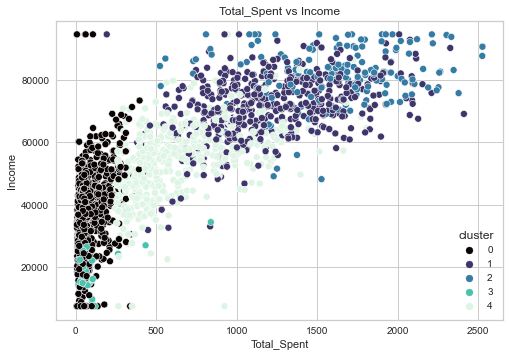

In [48]:
sns.scatterplot(x='Total_Spent', y='Income', hue='cluster', data=data, palette="mako")
plt.title('Total_Spent vs Income')
plt.show()

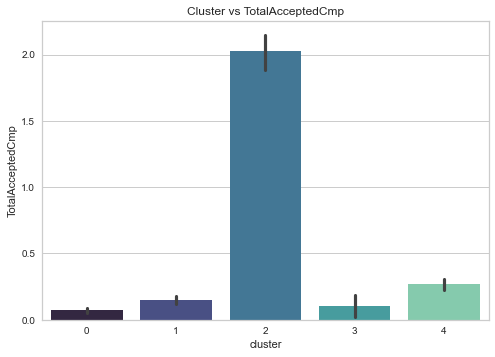

In [49]:
sns.barplot(x='cluster', y='TotalAcceptedCmp', data=data, palette="mako")
plt.title('Cluster vs TotalAcceptedCmp')
plt.show()

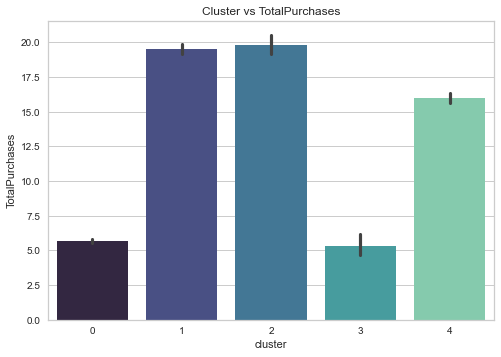

In [50]:
sns.barplot(x='cluster', y='TotalPurchases', data=data, palette="mako")
plt.title('Cluster vs TotalPurchases')
plt.show()

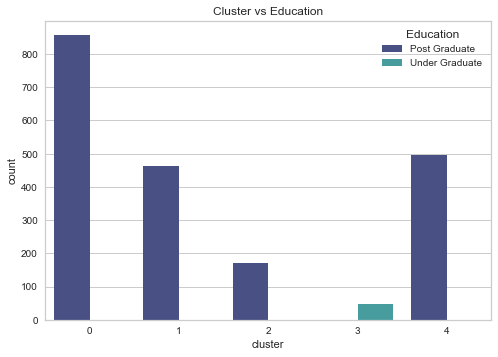

In [51]:
sns.countplot(x='cluster', hue = 'Education', data=data, palette="mako")
plt.title('Cluster vs Education')
plt.show()

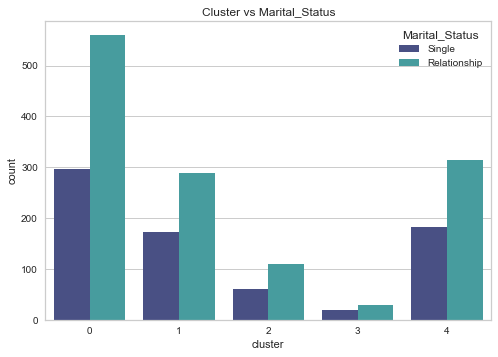

In [52]:
sns.countplot(x='cluster', hue = 'Marital_Status', data=data, palette="mako")
plt.title('Cluster vs Marital_Status')
plt.show()

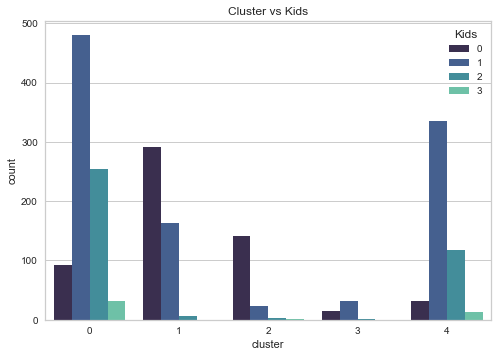

In [53]:
sns.countplot(x='cluster', hue = 'Kids', data=data, palette="mako")
plt.title('Cluster vs Kids')
plt.show()

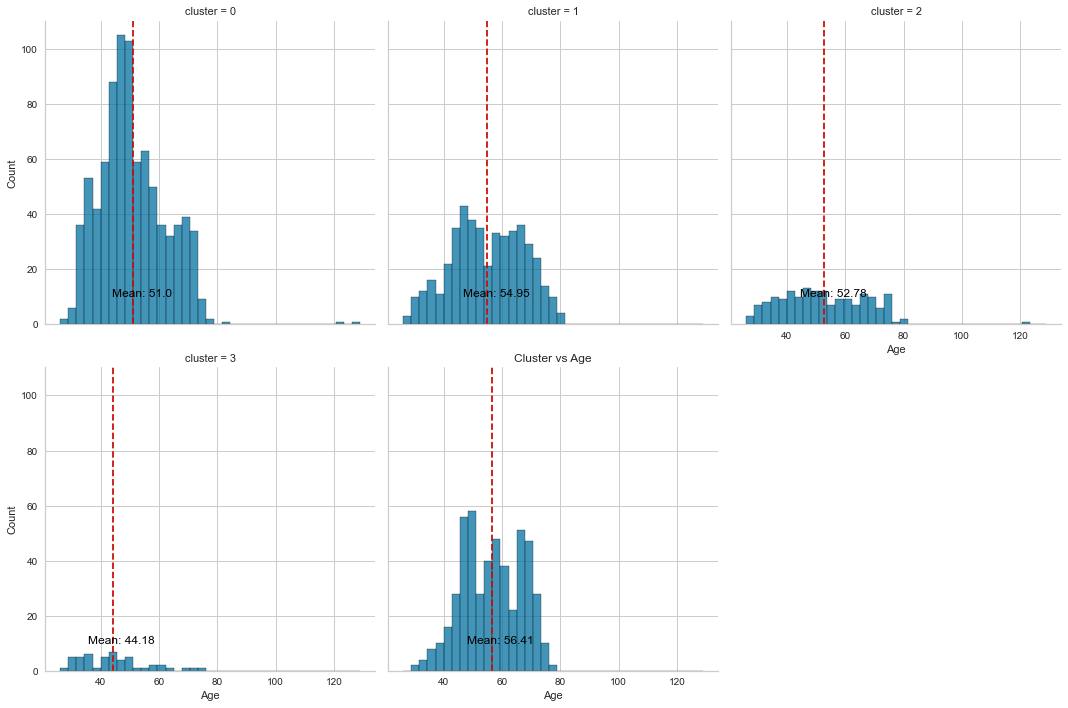

In [54]:
a = sns.displot(x='Age', col='cluster', col_wrap = 3, data=data)

def vertical_mean_line_survived(x, **kwargs):
    plt.axvline(x.mean(), linestyle = '--', color = 'r')
    plt.text(x.mean() + 3, 10,'Mean: ' + str(round(x.mean(),2)),
    horizontalalignment='center', color='black')
    
a.map(vertical_mean_line_survived, 'Age') 
plt.title('Cluster vs Age')
plt.show()

<AxesSubplot:xlabel='cluster', ylabel='count'>

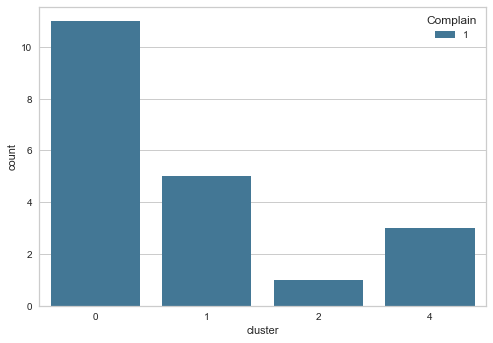

In [55]:
sns.countplot(x='cluster', hue = 'Complain', data=data[data['Complain'] == 1], palette="mako")

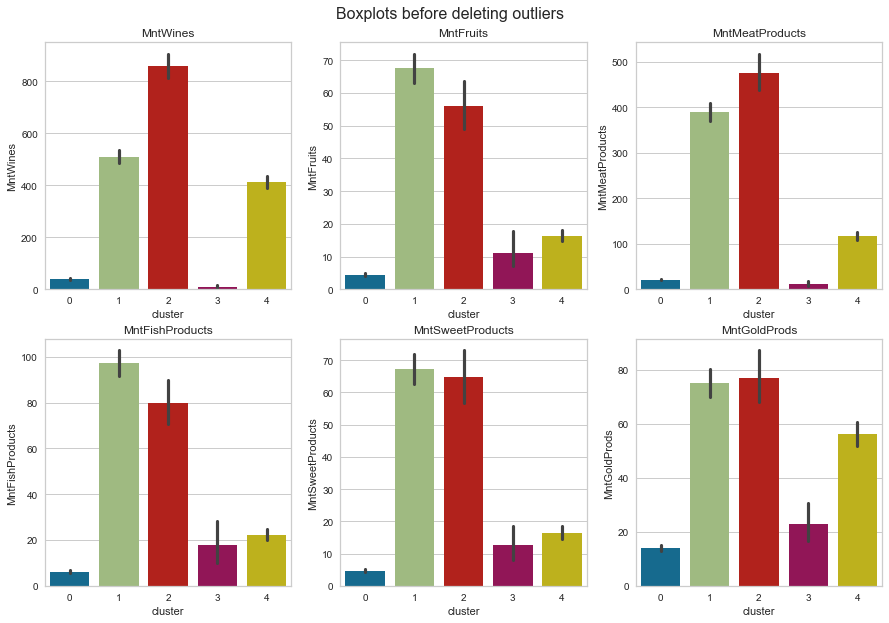

In [56]:
col_Mnt = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']

def plot_multivariate(plot, x, y, dataset, cols, suptitle, size):
    fig, axs = plt.subplots(math.ceil(len(y)/cols), cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, col in enumerate(y):
        if i % 5 == 0:
            axs[i].set_ylabel('Values')
        plot(x = x, y = col, data=dataset, ax=axs[i])
        axs[i].set_title(col)
        
plot_multivariate(plot = sns.barplot, x = 'cluster', y = col_Mnt, dataset=data, cols = 3, suptitle='Boxplots before deleting outliers', size=(15,10))

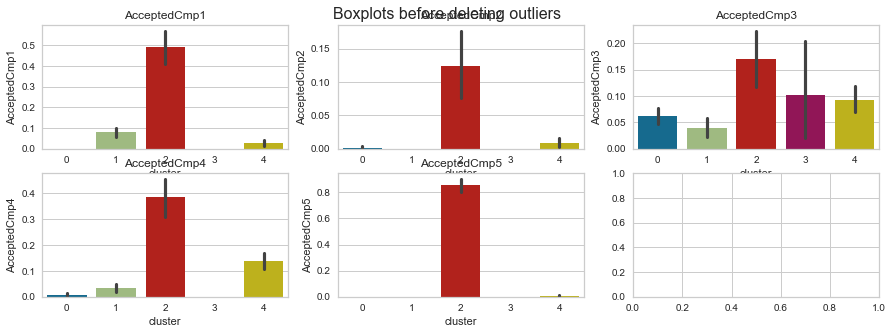

In [57]:
col_Acc = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

plot_multivariate(plot = sns.barplot, x = 'cluster', y = col_Acc, dataset=data, cols = 3, suptitle='Boxplots before deleting outliers', size=(15,5))

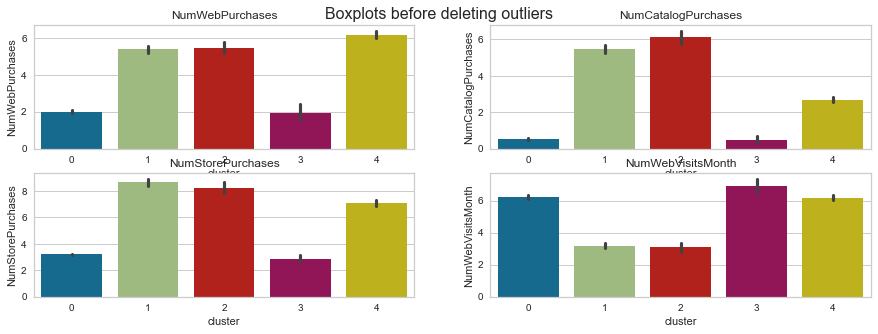

In [58]:
col_Num = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

plot_multivariate(plot = sns.barplot, x = 'cluster', y = col_Num, dataset=data, cols = 2, suptitle='Boxplots before deleting outliers', size=(15,5))